In [54]:
#### 1. Вывести: кол-во наблюдений в датасете
#### 2. Вывести названия столбцов
#### 3. Определить самую частую позицию (item) в заказе 
#### 4. Построить гистрограмму частоты заказов по позициям (item )
#### 5. Измените тип переменной item_price c с помощью лямбды функции
#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
#### 7. Средняя сумма заказа? (минимум 2 способа)
#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.
#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.
#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
#### 12. Определить цену по каждой позиции в отдельности. 

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

In [56]:
#### 1. Вывести: кол-во наблюдений в датасете
dataset.shape[0]

4622

In [57]:
#### 2. Вывести названия столбцов
dataset.columns.tolist()

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

In [58]:
#### 3. Определить самую частую позицию (item) в заказе 
dataset.groupby('item_name')['quantity'].sum().idxmax()

'Chicken Bowl'

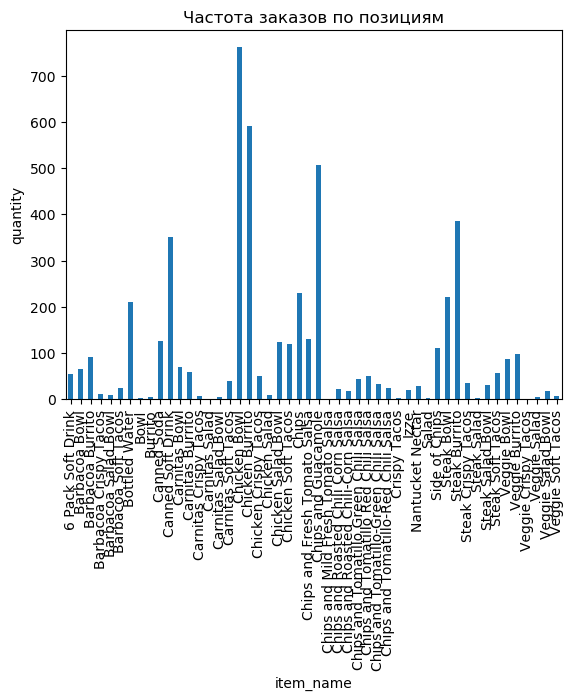

In [59]:
#### 4. Построить гистрограмму частоты заказов по позициям (item )
hist = dataset.groupby('item_name')['quantity'].sum().plot(kind='bar')
hist.set_ylabel('quantity')
plt.title('Частота заказов по позициям')
plt.show()

In [60]:
#### 5. Измените тип переменной item_price c с помощью лямбды функции
dataset.dtypes
dataset['item_price'] = dataset['item_price'].apply(lambda x: float(x[1:-1]))
dataset.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

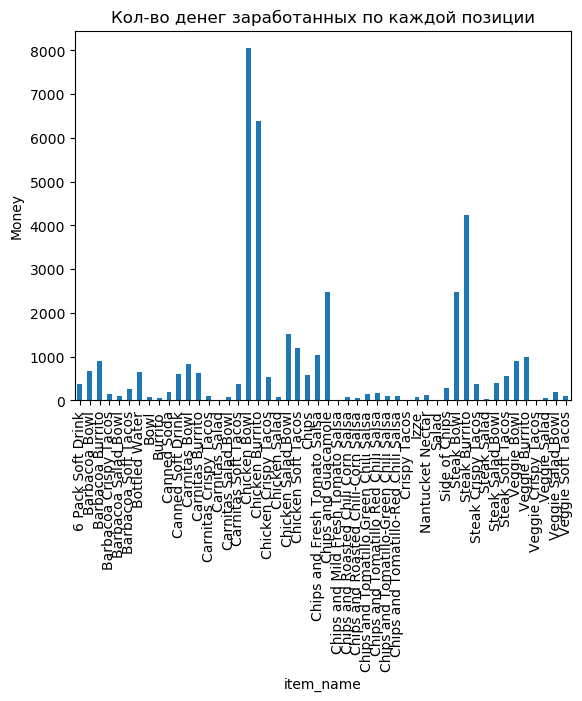

In [61]:
#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
item_price = pd.to_numeric(dataset['item_price'])
quantity = pd.to_numeric(dataset['quantity'])
dataset['sum_price'] = quantity * item_price
dataset.groupby('item_name')['sum_price'].sum().plot(kind='bar')
plt.xlabel('item_name')
plt.ylabel('Money')
plt.title('Кол-во денег заработанных по каждой позиции')
plt.show()

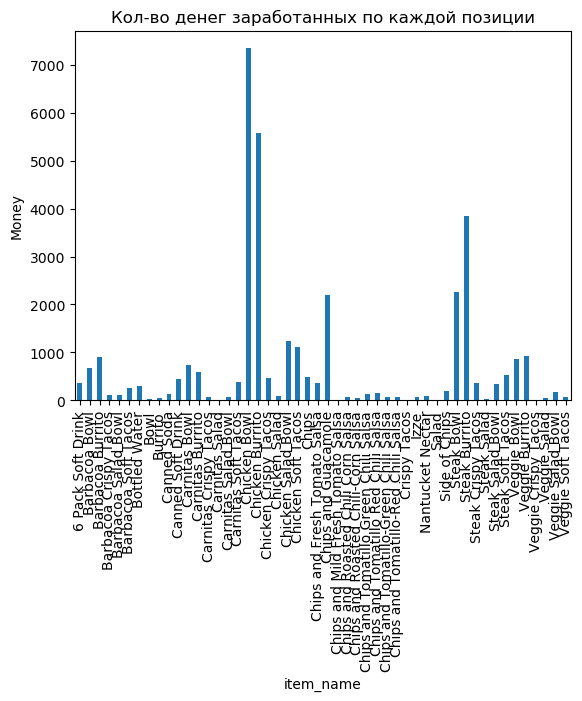

In [62]:
# 6 Построить гистограмму кол-во денег заработанных по каждой позиции
dataset.groupby('item_name')['item_price'].sum().plot(kind='bar')
plt.xlabel('item_name')
plt.ylabel('Money')
plt.title('Кол-во денег заработанных по каждой позиции')
plt.show()

In [67]:
# 7 Средняя сумма заказа?
print('1 способ:', dataset['item_price'].sum() / len(dataset.groupby('order_id')))
total_order_sum = dataset['item_price'].sum()
num_orders = len(set(dataset['order_id']))
average_order_price = total_order_sum / num_orders
print('2 способ:', average_order_price)

1 способ: 18.811428571428575
2 способ: 18.811428571428575


In [68]:
# 8 Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
group = dataset.groupby('order_id', sort=False).item_name.nunique().reset_index()
group.agg({
    'item_name': ['mean', 'min', 'max', 'median'],
})

,item_name
mean,2.34024
min,1.00000
max,8.00000
median,2.00000


In [69]:
# 9.1 Определить статистику заказов стейков
steaks = dataset[dataset.item_name.str.contains("Steak")]
steaks[["quantity", "item_price"]].describe()

,quantity,item_price
count,702.000000,702.000000
mean,1.045584,10.518889
std,0.228314,2.566743
min,1.000000,8.690000
25%,1.000000,8.990000
50%,1.000000,9.250000
75%,1.000000,11.750000
max,3.000000,27.750000


In [70]:
# 9.2 а также статистику заказов прожарки.
roasting = dataset[dataset.choice_description.str.contains("Mild|Medium|Hot", na=False)]
roasting[["quantity", "item_price"]].describe()

,quantity,item_price
count,783.000000,783.000000
mean,1.054917,9.772031
std,0.238920,2.588239
min,1.000000,8.190000
25%,1.000000,8.490000
50%,1.000000,8.990000
75%,1.000000,10.980000
max,3.000000,32.940000


In [71]:
# 10 Добавить новый столбец цен на каждую позицию в заказе в рублях.
dataset['price_in_rubles'] = dataset['item_price'].apply(lambda value: str(round(value * 75, 2)) + ' RUB')
dataset

,order_id,quantity,item_name,choice_description,item_price,sum_price,price_in_rubles
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,179.25 RUB
1,1,1,Izze,[Clementine],3.39,3.39,254.25 RUB
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,254.25 RUB
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,179.25 RUB
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96,1273.5 RUB
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75,881.25 RUB
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75,881.25 RUB
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25,843.75 RUB
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75,656.25 RUB


In [72]:
# 11 Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
group_by_items = dataset.groupby('order_id', sort=False).agg({'item_name': lambda x: ", ".join(x), 'item_price': np.sum, 'quantity': np.sum})
group_by_items


,item_name,item_price,quantity
order_id,,,
1,"Chips and Fresh Tomato Salsa, Izze, Nantucket ...",11.56,4
2,Chicken Bowl,16.98,2
3,"Chicken Bowl, Side of Chips",12.67,2
4,"Steak Burrito, Steak Soft Tacos",21.00,2
5,"Steak Burrito, Chips and Guacamole",13.70,2
...,...,...,...
1830,"Steak Burrito, Veggie Burrito",23.00,2
1831,"Carnitas Bowl, Chips, Bottled Water",12.90,3
1832,"Chicken Soft Tacos, Chips and Guacamole",13.20,2


In [73]:
steaks = dataset.loc[dataset['item_name'].str.contains('Steak')]
steaks.groupby('order_id').agg({'quantity':np.sum, 'item_name': lambda x: ", ".join(x), 'item_price':np.sum})

,quantity,item_name,item_price
order_id,,,
4,2,"Steak Burrito, Steak Soft Tacos",21.00
5,1,Steak Burrito,9.25
16,1,Steak Burrito,8.99
20,1,Steak Burrito,11.75
21,1,Steak Burrito,8.99
...,...,...,...
1810,1,Steak Crispy Tacos,11.75
1818,1,Steak Salad Bowl,9.39
1829,1,Steak Burrito,11.75


In [74]:
# 12 Определить цену по каждой позиции в отдельности.
dataset['price_per_item'] = round(dataset['item_price'] / dataset['quantity'], 2)
dataset.groupby(['item_name']).agg({ 'price_per_item': lambda x: x.unique() })

,price_per_item
item_name,
6 Pack Soft Drink,6.49
Barbacoa Bowl,"[11.75, 9.25, 8.99, 11.48, 8.69, 11.49]"
Barbacoa Burrito,"[8.99, 9.25, 11.75, 11.08, 8.69, 11.48]"
Barbacoa Crispy Tacos,"[11.75, 9.25, 11.48, 8.99]"
Barbacoa Salad Bowl,"[11.89, 9.39]"
Barbacoa Soft Tacos,"[9.25, 8.99, 11.75, 11.48]"
Bottled Water,"[1.09, 1.5]"
Bowl,7.4
Burrito,7.4
